In [2]:
# !pip install numpy matplotlib pandas tqdm

In [3]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
with open("metrics.json", encoding="utf-8") as f:
    data = json.load(f)

In [5]:
df = pd.DataFrame(data)
df["size"] = df["count"] * df["block_size"]
df.sort_values("duration", ascending=False)

,duration,value,block_size,count,runtime,device,size
1582,3.033495,1.501752,1024,440000,OpenCL Reduction,Intel(R) Arc(TM) Graphics,450560000
1762,2.782132,1.672394,1024,490000,OpenCL Reduction,Intel(R) Arc(TM) Graphics,501760000
1618,1.516498,1.535884,1024,450000,OpenCL Reduction,Intel(R) Arc(TM) Graphics,460800000
1150,1.425981,1.092214,1024,320000,OpenCL Reduction,Intel(R) Arc(TM) Graphics,327680000
1724,1.229098,0.250000,1024,480000,C++,Intel(R) Arc(TM) Graphics,491520000
...,...,...,...,...,...,...,...
9,0.000030,0.000532,16,10000,OpenBLAS,Intel(R) Arc(TM) Graphics,160000
109,0.000020,0.000532,4,40000,OpenBLAS,Intel(R) Arc(TM) Graphics,160000
37,0.000012,0.000266,4,20000,OpenBLAS,Intel(R) Arc(TM) Graphics,80000
5,0.000011,0.000266,8,10000,OpenBLAS,Intel(R) Arc(TM) Graphics,80000


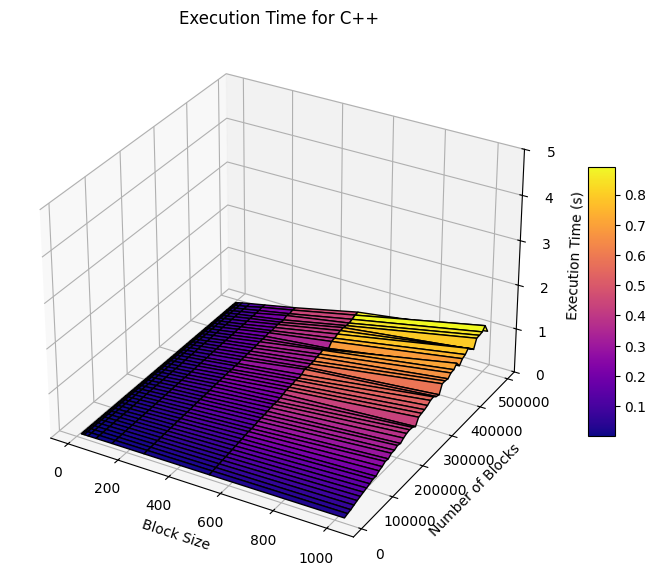

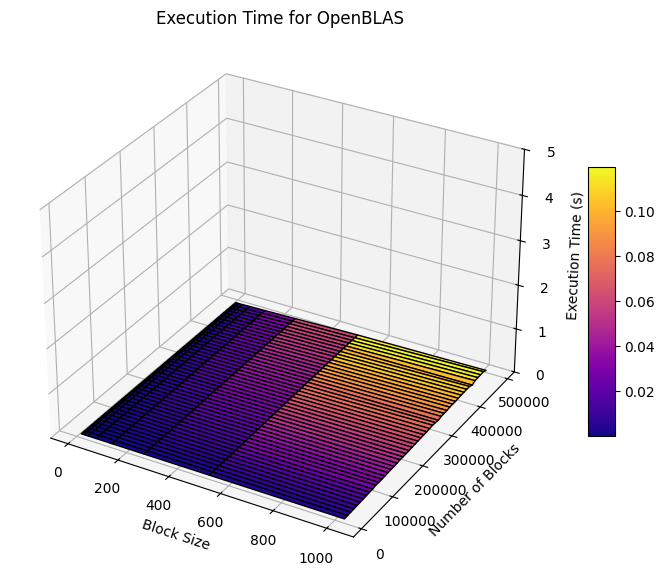

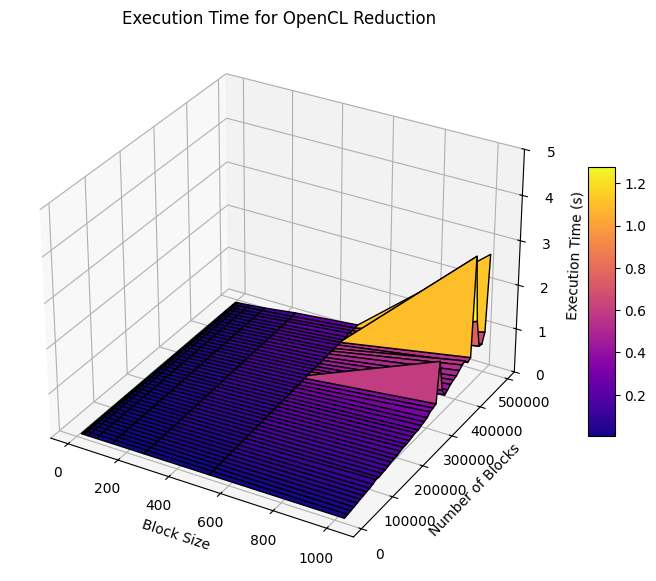

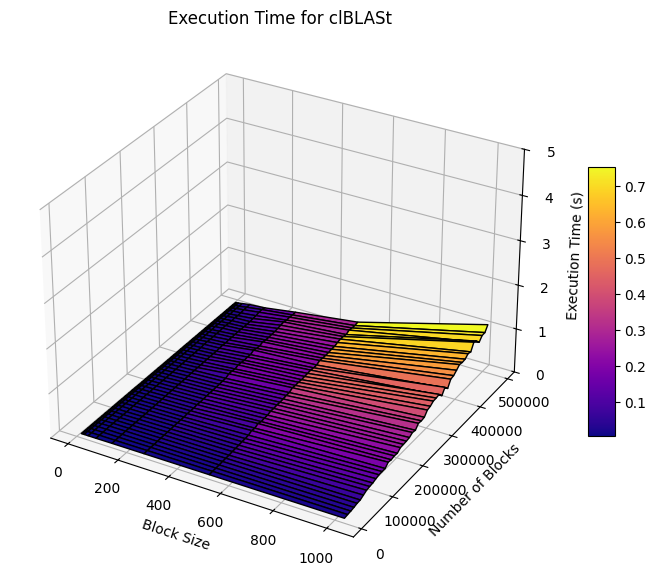

In [ ]:
runtimes = df["runtime"].unique()

for target_runtime in runtimes: 
    # target_runtime = 'OpenCL Reduction'
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['count'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['count'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    # ax.set_zbound(0, 5.0)
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
